In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import csv
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anguyen-07/DS7331-ML_Labs/master/data/airbnb_train.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

# Feature Creation

In [5]:
#create unlogged price variable
df['price'] = np.log(df['log_price'])

In [6]:
#create grade variable
df['grade'] = pd.cut(df.review_scores_rating, [0,60,70,80,90,101], right=False, labels = ['F', 'D', 'C', 'B', 'A'])
df[['grade', 'review_scores_rating']].head()

,grade,review_scores_rating
0,A,100.0
1,A,93.0
2,A,92.0
3,NaN,NaN
4,F,40.0


In [7]:
#create A/ not A variable
# Create altnerative target variable grade_grouped
new_grades = {
    'A':'A',
    'B':'<A',
    'C':'<A',
    'D':'<A',
    'F':'<A'
}
df['grade_grouped'] = df['grade'].map(new_grades)
df[['grade', 'grade_grouped']].head(20)

,grade,grade_grouped
0,A,A
1,A,A
2,A,A
3,NaN,NaN
4,F,<A
5,A,A
6,A,A
7,A,A
8,A,A
9,A,A


In [8]:
#create description length variable
df['description_length'] = df['description'].apply(len)

In [9]:
#create amenities length variable
import re
df['amenities_new'] = df.apply(lambda row: re.sub(r'[{}""]', '', row['amenities']), axis=1)
df['amenities_new'] = df.apply(lambda row: row['amenities_new'].lower().split(','), axis=1)
df = df.reset_index(drop=True)
df['length_amenities'] = df.apply(lambda row: len(row['amenities_new']), axis=1)
df[['amenities_new', 'length_amenities']].head()

,amenities_new,length_amenities
0,"[wireless internet, air conditioning, kitchen,...",9
1,"[wireless internet, air conditioning, kitchen,...",15
2,"[tv, cable tv, wireless internet, air conditio...",19
3,"[tv, cable tv, internet, wireless internet, ki...",15
4,"[tv, internet, wireless internet, air conditio...",12


In [10]:
#create number of days of being a host variable
import datetime
date_published = datetime.datetime(2018,3,14)
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_since_days'] = df.apply(lambda row: (date_published - row['host_since']).days, axis=1)
df['host_since_days'].head()

0    2179.0
1     268.0
2     505.0
3    1060.0
4    1109.0
Name: host_since_days, dtype: float64

In [11]:
#clean up host_response_rate
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(np.float64)

# Clean up data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 36 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null float64
host_since                73923 non-null datetime64[ns]
instant_bookable          74111 non-null object
last_review         

# Performing PCA

In [13]:
#only keep numeric data types and our response variables(grade, grade_grouped)
#for pca
df_pca = df[['accommodates', 'bathrooms', 'host_response_rate', 'latitude',
            'longitude', 'number_of_reviews', 'bedrooms', 'beds', 'price',
            'grade', 'grade_grouped', 'description_length', 'length_amenities',
            'host_since_days']]
df_pca.head()

,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,bedrooms,beds,price,grade,grade_grouped,description_length,length_amenities,host_since_days
0,3,1.0,NaN,40.696524,-73.991617,2,1.0,1.0,1.611563,A,A,211,9,2179.0
1,7,1.0,100.0,40.766115,-73.989040,6,3.0,3.0,1.635086,A,A,1000,15,268.0
2,5,1.0,100.0,40.808110,-73.943756,10,1.0,3.0,1.604774,A,A,1000,19,505.0
3,4,1.0,NaN,37.772004,-122.431619,0,2.0,2.0,1.890106,NaN,NaN,468,15,1060.0
4,2,1.0,100.0,38.925627,-77.034596,4,0.0,1.0,1.557077,F,<A,699,12,1109.0


In [14]:
#rows in original dataframe
len(df_pca)

74111

In [15]:
#rows in dataframe after dropping either response variable
print(len(df_pca.dropna(subset=['grade'])))
print(len(df_pca.dropna(subset=['grade_grouped'])))

57389
57389


In [16]:
df_pca = df_pca.dropna(subset=['grade'])

In [17]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57389 entries, 0 to 74110
Data columns (total 14 columns):
accommodates          57389 non-null int64
bathrooms             57230 non-null float64
host_response_rate    48003 non-null float64
latitude              57389 non-null float64
longitude             57389 non-null float64
number_of_reviews     57389 non-null int64
bedrooms              57319 non-null float64
beds                  57327 non-null float64
price                 57389 non-null float64
grade                 57389 non-null category
grade_grouped         57389 non-null object
description_length    57389 non-null int64
length_amenities      57389 non-null int64
host_since_days       57248 non-null float64
dtypes: category(1), float64(8), int64(4), object(1)
memory usage: 6.2+ MB


In [18]:
#lets just try to drop all the missing values and use the reponse variable
#grade grouped
df_pca2 = df_pca.dropna()

In [19]:
df_pca2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47787 entries, 1 to 74110
Data columns (total 14 columns):
accommodates          47787 non-null int64
bathrooms             47787 non-null float64
host_response_rate    47787 non-null float64
latitude              47787 non-null float64
longitude             47787 non-null float64
number_of_reviews     47787 non-null int64
bedrooms              47787 non-null float64
beds                  47787 non-null float64
price                 47787 non-null float64
grade                 47787 non-null category
grade_grouped         47787 non-null object
description_length    47787 non-null int64
length_amenities      47787 non-null int64
host_since_days       47787 non-null float64
dtypes: category(1), float64(8), int64(4), object(1)
memory usage: 5.1+ MB


In [20]:
df_pca2.describe()

,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,bedrooms,beds,price,description_length,length_amenities,host_since_days
count,47787.000000,47787.000000,47787.000000,47787.000000,47787.000000,47787.000000,47787.000000,47787.000000,4.778700e+04,47787.000000,47787.000000,47787.000000
mean,3.325005,1.239762,95.557034,38.364745,-93.207259,30.782891,1.281604,1.795153,-inf,833.920146,19.087325,1357.793291
std,2.236280,0.582529,13.296675,3.148342,21.704861,43.375046,0.865009,1.323257,NaN,275.443660,6.965131,671.459508
min,1.000000,0.000000,0.000000,33.338905,-122.511500,1.000000,0.000000,0.000000,-inf,1.000000,1.000000,170.000000
25%,2.000000,1.000000,100.000000,34.107511,-118.345159,5.000000,1.000000,1.000000,1.459560e+00,717.000000,14.000000,822.000000
50%,2.000000,1.000000,100.000000,40.650651,-77.025763,14.000000,1.000000,1.000000,1.547665e+00,1000.000000,19.000000,1295.000000
75%,4.000000,1.000000,100.000000,40.750911,-73.954705,39.000000,1.000000,2.000000,1.642966e+00,1000.000000,23.000000,1832.000000
max,16.000000,8.000000,100.000000,42.390437,-71.000462,605.000000,10.000000,18.000000,2.028201e+00,1000.000000,77.000000,3663.000000


In [21]:
#need to drop infinity values in price
df_pca2.replace([np.inf, -np.inf], np.nan, inplace=True)


In [22]:
df_pca2.dropna(inplace=True)

# Standardize the Data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
#separating out the features
x = df_pca2.drop(['grade', 'grade_grouped'], axis=1).values
x

array([[7.000e+00, 1.000e+00, 1.000e+02, ..., 1.000e+03, 1.500e+01,
        2.680e+02],
       [5.000e+00, 1.000e+00, 1.000e+02, ..., 1.000e+03, 1.900e+01,
        5.050e+02],
       [2.000e+00, 1.000e+00, 1.000e+02, ..., 6.990e+02, 1.200e+01,
        1.109e+03],
       ...,
       [4.000e+00, 2.000e+00, 1.000e+02, ..., 3.020e+02, 1.600e+01,
        6.800e+02],
       [5.000e+00, 1.000e+00, 1.000e+02, ..., 1.000e+03, 3.100e+01,
        2.260e+03],
       [4.000e+00, 1.000e+00, 1.000e+02, ..., 1.000e+03, 1.800e+01,
        1.934e+03]])

In [25]:
#separating out the target
y = df_pca2.loc[:, 'grade_grouped'].values
y

array(['A', 'A', '<A', ..., 'A', 'A', 'A'], dtype=object)

In [26]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[ 1.64334873, -0.41159751,  0.33414849, ...,  0.6029689 ,
        -0.58685438, -1.62310386],
       [ 0.7489963 , -0.41159751,  0.33414849, ...,  0.6029689 ,
        -0.01255888, -1.27013111],
       [-0.59253235, -0.41159751,  0.33414849, ..., -0.48981771,
        -1.017576  , -0.37057186],
       ...,
       [ 0.30182008,  1.30505957,  0.33414849, ..., -1.93113428,
        -0.4432805 , -1.00949722],
       [ 0.7489963 , -0.41159751,  0.33414849, ...,  0.6029689 ,
         1.7103276 ,  1.34365445],
       [ 0.30182008, -0.41159751,  0.33414849, ...,  0.6029689 ,
        -0.15613276,  0.85813075]])

In [27]:
#projection onto 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2'])

In [28]:
principalDf.head()

,PCA1,PCA2
0,1.981484,1.605542
1,0.524251,1.336153
2,-1.707416,0.474011
3,-1.077550,-1.155479
4,-0.476998,-1.843933


In [29]:
target = df_pca2.loc[:, 'grade_grouped']
target.head()

1     A
2     A
4    <A
5     A
6     A
Name: grade_grouped, dtype: object

In [30]:
target_colors = target.map({'A':'blue', '<A':'red'})
target_colors.head()

1    blue
2    blue
4     red
5    blue
6    blue
Name: grade_grouped, dtype: object

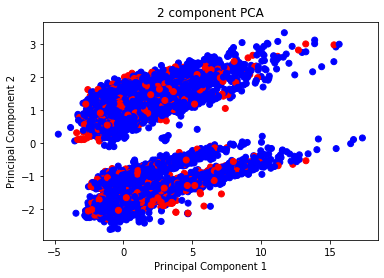

In [31]:
#Graphing the data
fig, ax = plt.subplots()
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')


ax.scatter(principalDf.PCA1, principalDf.PCA2, c=target_colors)

* does not separate out well

In [32]:
#the two principal components only explains less than 50% of the data
pca.explained_variance_ratio_

array([0.28568298, 0.15694207])

# K Means Clustering

In [33]:
df_cluster = df_pca2.copy()

In [34]:
df_cluster_x = df_pca2.drop(['grade', 'grade_grouped'], axis=1)

In [35]:
df_cluster.head()

,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,bedrooms,beds,price,grade,grade_grouped,description_length,length_amenities,host_since_days
1,7,1.0,100.0,40.766115,-73.989040,6,3.0,3.0,1.635086,A,A,1000,15,268.0
2,5,1.0,100.0,40.808110,-73.943756,10,1.0,3.0,1.604774,A,A,1000,19,505.0
4,2,1.0,100.0,38.925627,-77.034596,4,0.0,1.0,1.557077,F,<A,699,12,1109.0
5,2,1.0,100.0,37.753164,-122.429526,3,1.0,1.0,1.491251,A,A,1000,10,280.0
6,3,1.0,100.0,33.980454,-118.462821,15,1.0,1.0,1.485877,A,A,1000,21,376.0


In [36]:
from sklearn.cluster import KMeans

In [37]:
kmeans = KMeans(n_clusters=2)

### Try to get 2 clusters

In [38]:
#see if we can get clusters to mirror A or not A
kmeans.fit(df_cluster_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
labels = kmeans.predict(df_cluster_x)

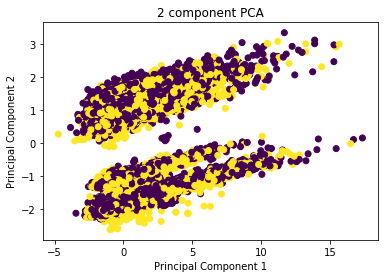

In [41]:
#look at original PCA plot
fig, ax = plt.subplots()
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')


ax.scatter(principalDf.PCA1, principalDf.PCA2, c=labels)

* did not do a good job with separation

# Elbow Plot

In [43]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

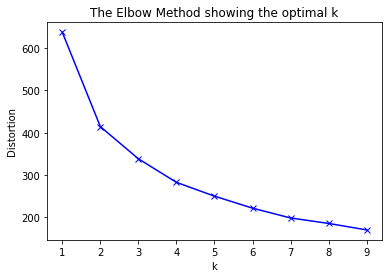

In [48]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_cluster_x)
    kmeanModel.fit(df_cluster_x)
    distortions.append(sum(np.min(cdist(df_cluster_x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_cluster_x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

* optimal k is two?

# Other clustering methods